In [18]:
import pathlib

img_dir = pathlib.Path('./imgs')
for img_path in img_dir.glob('*.png'):
    print(img_path)

imgs\00.png
imgs\01.png
imgs\02.png
imgs\03.png
imgs\10.png
imgs\11.png
imgs\12.png
imgs\13.png
imgs\20.png
imgs\21.png
imgs\22.png
imgs\23.png
imgs\30.png
imgs\31.png
imgs\32.png
imgs\33.png
imgs\40.png
imgs\41.png
imgs\42.png
imgs\43.png


In [19]:
selected_img_num = "00" #input("Select the number: ")
selected_img_path = pathlib.Path('./imgs') / (selected_img_num + '.png')

In [20]:
import cv2

img = cv2.imread(str(selected_img_path))
cv2.imshow('Selected Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
cv2.imshow('Binary Image', binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
from extract_digits import extract_digits_from_font

extract_digits_from_font('Bourgeois-Book.otf', output_dir='./digit_imgs', 
                         image_size=(63, 63), font_size=60, shift=(0,1))


Saved ./digit_imgs\0.png
Saved ./digit_imgs\1.png
Saved ./digit_imgs\2.png
Saved ./digit_imgs\3.png
Saved ./digit_imgs\4.png
Saved ./digit_imgs\5.png
Saved ./digit_imgs\6.png
Saved ./digit_imgs\7.png
Saved ./digit_imgs\8.png
Saved ./digit_imgs\9.png


{'0': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(63, 63), dtype=uint8),
 '1': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(63, 63), dtype=uint8),
 '2': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(63, 63), dtype=uint8),
 '3': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(63, 63), dtype=uint8),
 '4': array(

In [23]:
matching_img = cv2.imread('./digit_imgs/5.png')

Binary shape: (63, 147)
Matching shape: (63, 63)


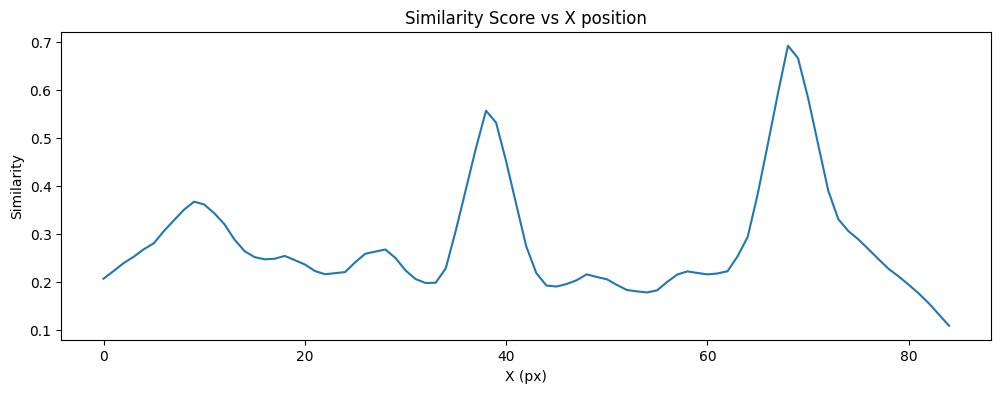

Best match at x=68 with score 0.6919


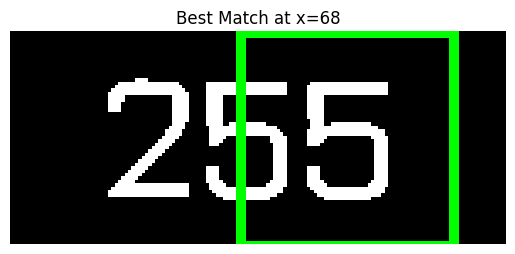

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure matching_img is grayscale (if it was loaded as BGR)
if len(matching_img.shape) == 3:
    matching_img = cv2.cvtColor(matching_img, cv2.COLOR_BGR2GRAY)

# Ensure matching_img is binary (0 or 255) like 'binary' variable
_, matching_img = cv2.threshold(matching_img, 127, 255, cv2.THRESH_BINARY) 

# Ensure heights match (resize matching_img to binary's height if needed)
if matching_img.shape[0] != binary.shape[0]:
    scale = binary.shape[0] / matching_img.shape[0]
    new_width = int(matching_img.shape[1] * scale)
    matching_img = cv2.resize(matching_img, (new_width, binary.shape[0]))
    _, matching_img = cv2.threshold(matching_img, 127, 255, cv2.THRESH_BINARY) # Re-binarize after resize

h_bin, w_bin = binary.shape
h_match, w_match = matching_img.shape

print(f"Binary shape: {binary.shape}")
print(f"Matching shape: {matching_img.shape}")

similarity_scores = []

# Sliding window: move matching by one pixel to the right
# Range: 0 to (w_bin - w_match)
for x in range(w_bin - w_match + 1):
    # Take the binary as a canvas, place matching on it (slice the ROI)
    roi = binary[:, x : x + w_match]
    
    # Compute similarity (using Normalized Cross Correlation)
    # Since roi and matching_img are same size, matchTemplate returns 1x1 result
    res = cv2.matchTemplate(roi, matching_img, cv2.TM_CCOEFF_NORMED)
    score = res[0][0]
    
    similarity_scores.append(score)

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(similarity_scores)
plt.title("Similarity Score vs X position")
plt.xlabel("X (px)")
plt.ylabel("Similarity")
plt.show()

# Show the best match result
best_x = np.argmax(similarity_scores)
print(f"Best match at x={best_x} with score {similarity_scores[best_x]:.4f}")

result_vis = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
cv2.rectangle(result_vis, (best_x, 0), (best_x + w_match, h_bin), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(result_vis, cv2.COLOR_BGR2RGB))
plt.title(f"Best Match at x={best_x}")
plt.axis('off')
plt.show()